# Day 7-10

- Explore different ***advanced CNN architectures*** (GoogLeNet (InceptionVX), ResNet, EfficientNet, MobileNet, etc.)
- Use ***Transfer Learning*** on some of the advanced CNN architectures (using different dataset, ***not CIFAR10***).

## **Transfer Learning**
In practice, very few people train an entire Convolutional Network from scratch (with random initialization), because it is relatively rare to have a dataset of sufficient size. Instead, it is common to pretrain a ConvNet on a very large dataset (e.g. ImageNet, which contains 1.2 million images with 1000 categories), and then use the ConvNet either as an initialization or a fixed feature extractor for the task of interest.

### **The Most Commonly Used Models for Transfer Learning:**

### 1. **VGGNet (VGG16, VGG19)**
   - **Introduced**: 2014
   - **Key Features**:
     - VGGNet uses **very deep networks** (16 or 19 layers) with small 3x3 filters.
     - Consistent architecture: uses only 3x3 convolutional layers followed by max-pooling layers.
     - Transition to **fully connected layers** at the end of the network for classification.
   - **Advantages**: Simple and uniform structure.
   - **Disadvantages**: Large number of parameters (due to fully connected layers), which makes it slow to train.
   - **Use in Transfer Learning**: Works well when fine-tuned on other datasets. Often used in computer vision tasks like classification.

### 2. **Inception (GoogLeNet, Inception v3, v4)**
   - **Introduced**: GoogLeNet (2014); Inception v3 (2016)
   - **Key Features**:
     - Introduced the **Inception module**, which allows for more efficient computation by combining filters of different sizes (1x1, 3x3, 5x5) in parallel within the same layer.
     - Inception v3 also incorporates **factorized convolutions** (e.g., splitting a 3x3 convolution into two 1D convolutions).
   - **Advantages**: Efficient in terms of computation and memory.
   - **Disadvantages**: The architecture can be complex to understand and implement from scratch.
   - **Use in Transfer Learning**: Very popular for image classification tasks, especially on large datasets.

### 3. **ResNet (Residual Networks)**
   - **Introduced**: 2015
   - **Key Features**:
     - ResNet introduced the concept of **residual learning**, where the network learns residuals (differences from the identity mapping).
     - **Skip connections** allow information to bypass certain layers, solving the **vanishing gradient problem** for very deep networks.
     - Available in various depths (ResNet-18, ResNet-50, ResNet-101).
   - **Advantages**: Extremely deep models (over 100 layers) without performance degradation.
   - **Disadvantages**: Despite residual connections, ResNets can still become computationally expensive for large datasets.
   - **Use in Transfer Learning**: One of the most widely used architectures for transfer learning due to its robustness and versatility.

### 4. **DenseNet**
   - **Introduced**: 2017
   - **Key Features**:
     - Introduced **dense connections**, where each layer receives inputs from all previous layers and passes its output to subsequent layers.
     - Reduces the number of parameters compared to traditional CNNs by **reusing features**.
   - **Advantages**: Efficient use of parameters and effective at feature propagation.
   - **Disadvantages**: Dense connections can increase memory usage.
   - **Use in Transfer Learning**: Commonly used for image classification and segmentation tasks.

### 5. **MobileNet (MobileNet v1, v2, v3)**
   - **Introduced**: MobileNet v1 (2017); MobileNet v2 (2018); MobileNet v3 (2019)
   - **Key Features**:
     - **Designed for mobile and embedded vision applications**: lightweight model with fewer parameters.
     - Uses **depthwise separable convolutions** (factorized convolutions) to reduce the number of parameters.
     - MobileNet v2 introduced the **inverted residual block**, which improves efficiency.
   - **Advantages**: Highly efficient for mobile and low-resource environments.
   - **Disadvantages**: Sacrifices some accuracy for model size and speed.
   - **Use in Transfer Learning**: Ideal for applications where model size and speed are crucial, such as on-device ML.

### 6. **Xception**
   - **Introduced**: 2017
   - **Key Features**:
     - **"Extreme" version of Inception**, where Inception modules are replaced with **depthwise separable convolutions**.
     - Built on top of the ideas of Inception but simplifies the architecture.
   - **Advantages**: Better performance compared to Inception in many cases, while maintaining efficiency.
   - **Disadvantages**: Can be computationally intensive.
   - **Use in Transfer Learning**: Popular for image classification and tasks like object detection.

### 7. **EfficientNet**
   - **Introduced**: 2019
   - **Key Features**:
     - Introduced the idea of **compound scaling**, where the network is scaled in a balanced way across depth, width, and resolution.
     - Achieves better performance with fewer parameters compared to other CNN architectures.
   - **Advantages**: Excellent accuracy and efficiency balance, outperforming most architectures on various datasets.
   - **Disadvantages**: Scaling parameters need to be carefully tuned for different tasks.
   - **Use in Transfer Learning**: EfficientNet is often used for transfer learning on image classification tasks because of its accuracy and efficiency.

### 8. **NASNet**
   - **Introduced**: 2018
   - **Key Features**:
     - **Neural Architecture Search (NAS)**-based network: Uses reinforcement learning to automatically design the network architecture.
     - Comes in two versions: **NASNet-A Mobile** (for mobile devices) and **NASNet-A Large** (for large-scale datasets).
   - **Advantages**: Offers state-of-the-art performance on several benchmarks.
   - **Disadvantages**: NASNet Large can be computationally expensive.
   - **Use in Transfer Learning**: NASNet Mobile is often used when computational resources are limited, while NASNet Large is used for large-scale tasks.

---

### Summary Comparison for Transfer Learning:

- **VGGNet**: Large models but still widely used for transfer learning due to their simplicity.
- **Inception**: Efficient multi-scale feature extraction; widely used for image classification.
- **ResNet**: Extremely deep, robust networks. Probably the most popular for transfer learning.
- **DenseNet**: Efficient feature propagation and parameter usage.
- **MobileNet**: Highly efficient and lightweight, great for mobile and edge devices.
- **Xception**: A powerful and efficient alternative to Inception.
- **EfficientNet**: Great balance of accuracy and model size, ideal for a wide range of tasks.
- **NASNet**: Automatically optimized architectures, offering state-of-the-art performance.

All these architectures are available pre-trained in frameworks like **TensorFlow** and **PyTorch**, making them easy to apply for transfer learning by fine-tuning them on custom datasets.

(res. *ChatGPT*)

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as tfhb
import warnings
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.style.use("ggplot")

warnings.filterwarnings('ignore')

<Figure size 1000x800 with 0 Axes>

### Loading `cats_vs_dogs` dataset from `tensorflow_datasets`:

In [ ]:
(train_data, test_data), metadata = tfds.load(
    'cats_vs_dogs', # name of the dataset
    split=['train[:80%]', 'train[80%:]'],  # 80% train, 20% test split
    as_supervised=True,  # Load data as (image, label) pairs
    shuffle_files=True,  # Shuffle the dataset
    with_info=True  # Get metadata about the dataset
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.S3W36V_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [ ]:
labels = ['cat', 'dog']

In [ ]:
assert isinstance(train_data, tf.data.Dataset)
assert isinstance(test_data, tf.data.Dataset)

# Check an example
for image, label in train_data.take(1):
    print(f'Image shape: {image.shape}, Label: {label}')

Image shape: (445, 471, 3), Label: 1


In [8]:
# Accuracy and losses comparison plotting function
def plot_accuracy_and_loss_comparison(history, epochs):
  plt.figure(figsize=(10, 10))
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(epochs)
  plt.figure(figsize=(10, 10))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title(f'Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title(f'Training and Validation Loss')

  plt.show()

In [9]:
IMG_SIZE = 224

# Function to preprocess the images
def preprocess_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0

    return image, label

In [ ]:
# Apply preprocessing to the datasets
train_data = train_data.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
test_data = test_data.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)

In [ ]:
# Batch and shuffle the training dataset
BATCH_SIZE = 32

train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_data = test_data.batch(batch_size=BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [ ]:
# Check the output
for image_batch, label_batch in train_data.take(1):
    print(image_batch.shape)

(32, 224, 224, 3)


In [7]:
def display_images_with_labels(images, values, class_names):
  plt.figure(figsize=(12, 10))
  fig, axes = plt.subplots(1, 5)
  for img, lbl, ax in zip(images, values, axes):
    ax.imshow(img)
    ax.set_title(class_names[lbl])
    ax.axis("off")
  plt.grid(False)
  plt.show()

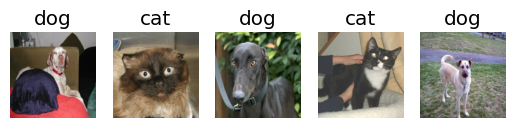

In [ ]:
images, values = next(iter(train_data))
display_images_with_labels(images[:5], values[:5], labels)

In [ ]:
# Let's also apply some data augmentations
data_aug = tf.keras.models.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1)  # +-(0.1 * 360) = +-36
])

train_data = train_data.map(lambda x, y: (data_aug(x, training=True), y),
                            num_parallel_calls=tf.data.AUTOTUNE)

### **`inception_v3`** Transfer Training on `cats_vs_dogs` dataset

- **`InceptionV1`** is **`GoogLeNet`** CNN architecture, which won ImageNet Large-Scale Visual Recognition Challenge 2014 (ILSVRC14), but after releasing new versions was renamed to `InceptionV1`. Consists of 22 layers. Most of these layers were "Inception modules".
- **`InceptionV2`** was released in 2015. It improves on `Inception V1` by using factorized convolutions. For example, a single 5×5 convolution can be factored into 3×3 stacked on top of another 3×3.
- **`InceptionV3`** also was released in 2015. It improves on `InceptionV2` by using RMSProp optimizer, Factorized 7×7 convolutions, BatchNorm in the auxillary classifiers and Label smoothing.
- In 2017 the team released **`InceptionV4`**, **`InceptionResNetV1`**, and **`InceptionResNetV2`**. Inception v4 is an incremental update with even more factorized convolutions, and other complications that were empirically found to improve benchmarks. Inception ResNet v1 and v2 are both modifications of Inception v4, where residual connections are added to each Inception module.

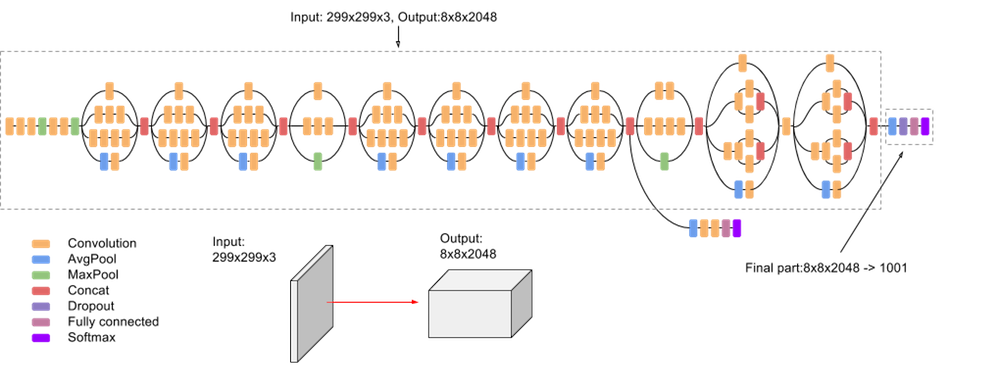

In [ ]:
from tensorflow.keras.applications import InceptionV3, ResNet50, MobileNet, EfficientNetB2

In [ ]:
base_model = InceptionV3(
    include_top=False,
    weights="imagenet",
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)

# Freeze the base model's layers
base_model.trainable = False

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Add new layers on top of the base model
inception_v3_model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024),
    tf.keras.layers.BatchNormalization(momentum=0.9),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification for cats vs dogs
])

In [ ]:
# Compile the model
inception_v3_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=5e-3, momentum=0.9, nesterov=True),
                           loss=tf.keras.losses.BinaryCrossentropy,
                           metrics=['accuracy'])

In [ ]:
# Let's see the model's summary
inception_v3_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 5, 5, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      52,429,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_94               │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_94 (Activation)           │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 126,670,628 (483.21 MB)

 Trainable params: 52,432,897 (200.02 MB)

 Non-trainable params: 21,804,832 (83.18 MB)

 Optimizer params: 52,432,899 (200.02 MB)

In [ ]:
EPOCHS = 5

In [ ]:
# Fit the model
inception_v3_history = inception_v3_model.fit(train_data, epochs=EPOCHS, validation_data=test_data)

Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 179s 272ms/step - accuracy: 0.9637 - loss: 0.1061 - val_accuracy: 0.9899 - val_loss: 0.0283
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 149s 253ms/step - accuracy: 0.9815 - loss: 0.0493 - val_accuracy: 0.9884 - val_loss: 0.0308
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 190s 233ms/step - accuracy: 0.9846 - loss: 0.0407 - val_accuracy: 0.9888 - val_loss: 0.0295
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 142s 233ms/step - accuracy: 0.9850 - loss: 0.0404 - val_accuracy: 0.9877 - val_loss: 0.0325
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 175s 290ms/step - accuracy: 0.9869 - loss: 0.0336 - val_accuracy: 0.9895 - val_loss: 0.0294


<Figure size 1000x1000 with 0 Axes>

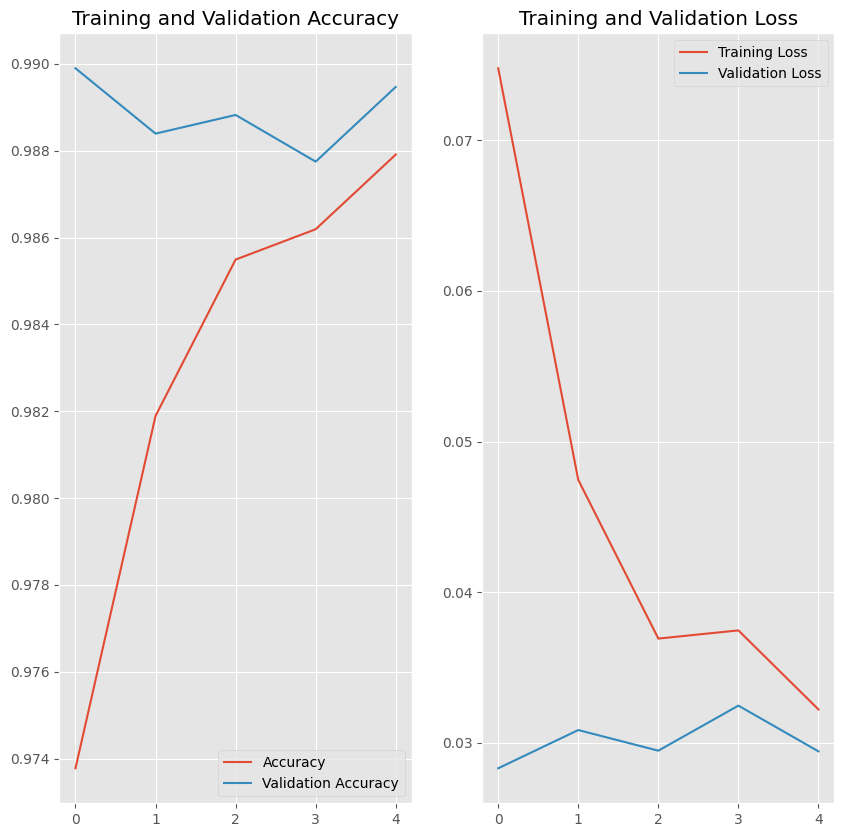

In [ ]:
plot_accuracy_and_loss_comparison(inception_v3_history, EPOCHS)

In [ ]:
test_images, true_labels = next(iter(test_data))
test_images.shape, true_labels.shape

(TensorShape([32, 224, 224, 3]), TensorShape([32]))

In [6]:
def plot_test_predictions(images, labels, preds, classes, batch=32, figsize=(10, 10)):
  fig, axes = plt.subplots(batch // 4, 4, figsize=figsize)
  axes = axes.flatten()
  for img, lbl, pred, ax in zip(images, labels, preds, axes):
    ax.imshow(img)

    if lbl == pred:
      ax.set_title(classes[lbl], color='blue')  # prediction is correct
    else:
      ax.set_title(classes[pred], color='red')  # prediction is incorrect

    ax.axis('off')

  plt.show()

In [ ]:
test_preds = inception_v3_model.predict(test_images)
test_preds = (test_preds > 0.5).astype(int)
test_preds = tf.squeeze(test_preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


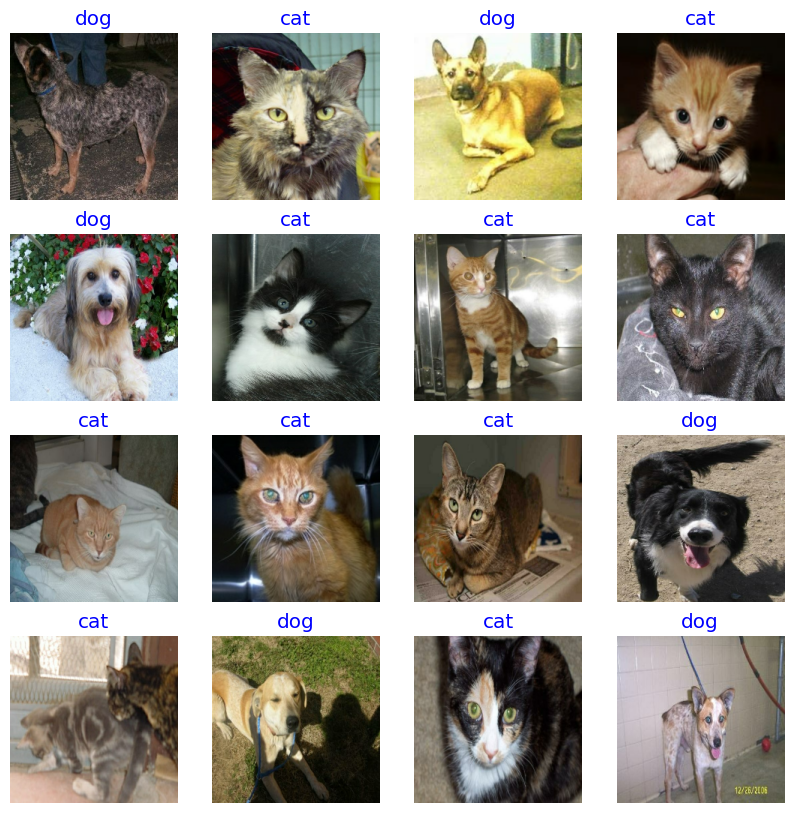

In [ ]:
plot_test_predictions(test_images[:16], true_labels[:16], test_preds[:16], labels, batch=16)

### Wow! Everything is correct, great job is done by the Inception Model! Let's try some other examples.

## `MobileNetV2` Transfer Learning on `tf_flowers` dataset (this is a bit modified exercise from `Udemy`, `"Intro to TensorFlow for Deep Learning" course` (6.7)

## Information about **MobileNetV1** model ([link](https://youtu.be/v2zM-DVSUkQ?si=4lYQS2HH10A3o5UD)):
**MobileNetV1** is the original version of the MobileNet family, designed to provide efficient neural network architecture for mobile and embedded devices. It introduced a novel approach called **depthwise separable convolutions** to reduce the computational cost of traditional convolutional networks.

### Key Features of MobileNetV1:
1. **Depthwise Separable Convolutions**: This is the core idea behind MobileNetV1. Instead of using a standard convolution that applies multiple filters across all input channels, it splits the convolution into two steps:
   - **Depthwise Convolution**: Applies a single filter to each input channel independently.
   - **Pointwise Convolution**: Uses 1x1 convolutions to combine the outputs from the depthwise step.
   
   This reduces the computational complexity significantly while maintaining good accuracy.

2. **Efficient Architecture**: By using depthwise separable convolutions, MobileNetV1 reduces the number of parameters and floating-point operations (FLOPs) compared to traditional convolutional networks, making it much lighter and faster.

3. **Width Multiplier**: MobileNetV1 introduced a **width multiplier** (α), a hyperparameter that controls the number of channels in each layer. This allows you to adjust the trade-off between accuracy and model size, making it possible to use smaller versions of the network for even faster inference on resource-constrained devices.

4. **Resolution Multiplier**: Another hyperparameter, the **resolution multiplier** (ρ), reduces the input image size, further lowering the computational cost at the expense of some accuracy.

### Applications:
MobileNetV1 is well-suited for mobile and embedded vision applications, such as:
- Image classification
- Object detection
- Facial recognition

It provides a good balance between accuracy and efficiency, enabling deep learning models to run on devices with limited computing resources.

### Summary:
MobileNetV1 introduced **depthwise separable convolutions** to significantly reduce computational cost while maintaining accuracy. It is highly efficient and customizable through its width and resolution multipliers, making it a popular choice for mobile and real-time applications where computational resources are limited.

## Information about **MobileNetV2** model:
**MobileNetV2** is a lightweight and efficient convolutional neural network architecture designed for mobile and embedded vision applications. It is an improvement over MobileNetV1 and is specifically optimized for performance on devices with limited computational power.

### Key Features of MobileNetV2:
1. **Inverted Residuals**: Unlike traditional residual connections, where the input and output dimensions are the same, MobileNetV2 uses **inverted residual blocks**. These blocks first expand the input using a 1x1 convolution, apply depthwise separable convolutions, and then reduce the dimensions back. This helps to capture features more efficiently with fewer computations.

2. **Depthwise Separable Convolutions**: Similar to MobileNetV1, MobileNetV2 uses depthwise separable convolutions, where the standard convolution is split into two smaller operations:
   - A **depthwise convolution**, which applies a single filter to each input channel.
   - A **pointwise convolution**, which combines the outputs of the depthwise convolution.
   This drastically reduces the number of parameters and computation compared to standard convolutions.

3. **Linear Bottlenecks**: Each block in MobileNetV2 has a **linear bottleneck** layer at the end, which avoids introducing non-linearities in lower-dimensional spaces. This helps preserve information in low-dimensional representations and improves efficiency.

4. **Improved Accuracy-Efficiency Trade-off**: MobileNetV2 offers a better balance between computational cost and accuracy than its predecessor, making it ideal for real-time applications on mobile and embedded devices.

### Applications:
MobileNetV2 is widely used in tasks like image classification, object detection, and face recognition, especially where computational resources are limited (e.g., smartphones, IoT devices).

### Summary:
MobileNetV2 combines inverted residuals, depthwise separable convolutions, and linear bottlenecks to achieve high efficiency and good accuracy for mobile applications. It's designed to run quickly on devices with low computational power without sacrificing performance too much.

Source: *ChatGPT* (yes, I use it quite a lot.😁)

Research Paper: [link](https://arxiv.org/pdf/1801.04381v4)

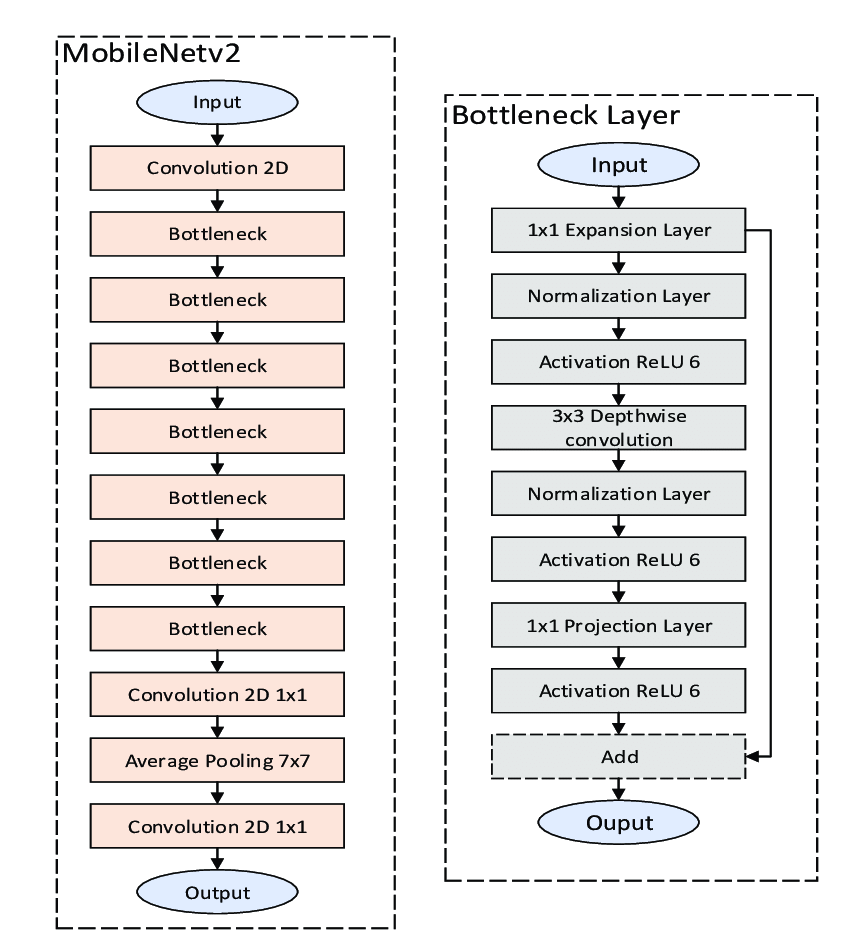

In [2]:
# I'm going to again import all the necessary libraries, because I don't want to execute the first cell each time
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub

import numpy as np
import matplotlib.pyplot as plt

import warnings
import logging

In [3]:
warnings.filterwarnings('ignore')

logger = tf.get_logger()
logger.setLevel(logging.ERROR)

plt.figure(figsize=(10, 8))
plt.style.use('ggplot')

<Figure size 1000x800 with 0 Axes>

### Loading `tf_flowers` dataset from `tensorflow_datasets`:

In [30]:
splits = ['train[:75%]', 'train[75%:]']

(train_data, test_data), metadata = tfds.load(
    'tf_flowers',
    split=splits,
    with_info=True,
    as_supervised=True
)

In [31]:
num_classes = metadata.features['label'].num_classes
num_training_examples = len(train_data)
num_testing_examples = len(test_data)
labels = metadata.features['label'].names

print(f'Total number of Classes: {num_classes}')
print(f'Total number of Training Images: {num_training_examples}')
print(f'Total number of Testing Images: {num_testing_examples}')

Total number of Classes: 5
Total number of Training Images: 2752
Total number of Testing Images: 918


In [ ]:
for i, example in enumerate(train_data.take(5)):
  print(f'Image {i+1} shape: {example[0].shape} label: {example[1]}')

Image 1 shape: (333, 500, 3) label: 2
Image 2 shape: (212, 320, 3) label: 3
Image 3 shape: (240, 320, 3) label: 3
Image 4 shape: (240, 320, 3) label: 4
Image 5 shape: (317, 500, 3) label: 3


### Preprocess images and create batches

In [10]:
IMG_SIZE = 224

def preprocess_image(image, label):
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE)) / 255.0
  return image, label

In [11]:
# Add preprocessing "layers"
train_data = train_data.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
test_data = test_data.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)

In [12]:
# Shuffle the data and create batches
BATCH_SIZE = 32

train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_data = test_data.batch(batch_size=BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

<Figure size 1200x1000 with 0 Axes>

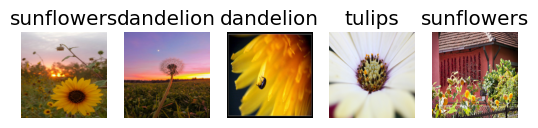

In [13]:
images, values = next(iter(train_data))
display_images_with_labels(images[:5], values[:5], labels)

### Load a pretrained `MobileNetV2` model and freeze its parameters + add top layers
#### We can either use `tf.keras.applications.MobileNetV2` or `tensorflow_hub` to load a model. Using the latter you can seamlessly load any model you want from this tensorflow advanced pretrained models "registry", but I'll stick to `tf.keras.applications`.

In [51]:
from tensorflow.keras.applications import MobileNetV2

In [52]:
base_model = MobileNetV2(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights='imagenet'
)

In [53]:
base_model.trainable = False

In [ ]:
# MobileNetV2 model summary
# base_model.summary()

In [54]:
# Build a model
mobilenet_v2_model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),  # it computes the average of all the elements in each feature map, resulting in a single value for each feature map

    tf.keras.layers.Dense(num_classes, activation="softmax")
])

In [18]:
# Compile the model
mobilenet_v2_model.compile(optimizer=tf.keras.optimizers.Adam(),
                           loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                           metrics=['accuracy'])

In [20]:
# Let's see the model's summary
mobilenet_v2_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │           6,405 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,277,201 (8.69 MB)

 Trainable params: 6,405 (25.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 12,812 (50.05 KB)

# **TODO** Rerun the model below and execute cells with model evaluation and model saving.

In [19]:
# Train/Fit the model
EPOCHS = 12

mobilenet_v2_history = mobilenet_v2_model.fit(train_data,
                                              epochs=EPOCHS,
                                              validation_data=test_data)

Epoch 1/12
86/86 ━━━━━━━━━━━━━━━━━━━━ 35s 174ms/step - accuracy: 0.5829 - loss: 1.0970 - val_accuracy: 0.8464 - val_loss: 0.4803
Epoch 2/12
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 51ms/step - accuracy: 0.8687 - loss: 0.4077 - val_accuracy: 0.8715 - val_loss: 0.4004
Epoch 3/12
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.8990 - loss: 0.3133 - val_accuracy: 0.8715 - val_loss: 0.3717
Epoch 4/12
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.9170 - loss: 0.2698 - val_accuracy: 0.8780 - val_loss: 0.3546
Epoch 5/12
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.9377 - loss: 0.2239 - val_accuracy: 0.8867 - val_loss: 0.3449
Epoch 6/12
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.9465 - loss: 0.2060 - val_accuracy: 0.8932 - val_loss: 0.3402
Epoch 7/12
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.9492 - loss: 0.1855 - val_accuracy: 0.8889 - val_loss: 0.3383
Epoch 8/12
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9603 - loss: 0.1675 - val_accuracy: 0.893

<Figure size 1000x1000 with 0 Axes>

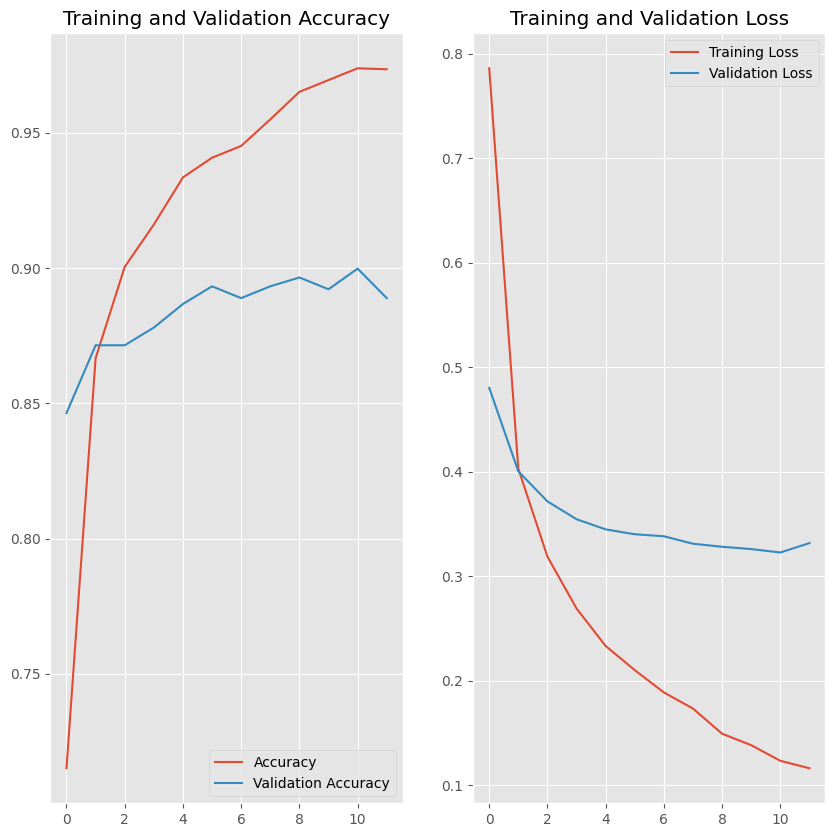

In [21]:
plot_accuracy_and_loss_comparison(mobilenet_v2_history, EPOCHS)

In [22]:
test_images, true_labels = next(iter(test_data))

In [23]:
test_preds = mobilenet_v2_model.predict(test_images)
test_preds.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


(32, 5)

In [24]:
test_preds = np.argmax(test_preds, axis=1)  # the max values for each row
test_preds = tf.squeeze(test_preds)

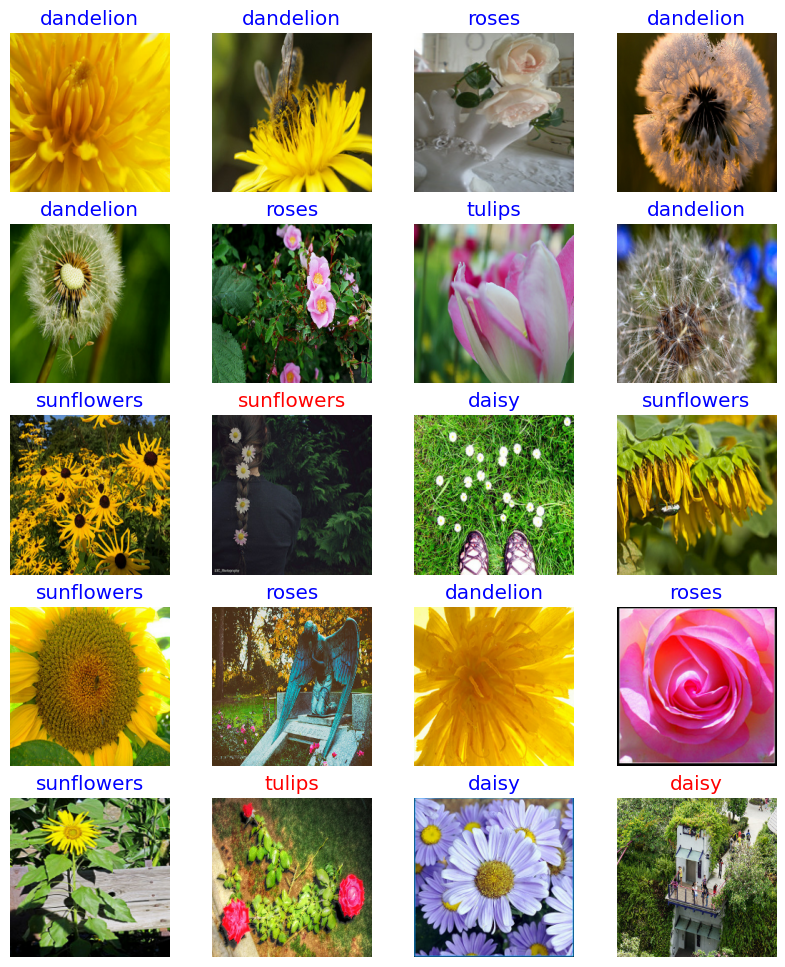

In [25]:
plot_test_predictions(test_images[:20], true_labels[:20], test_preds[:20], labels, batch=20, figsize=(10, 12))

## The **accuracy** has reached almost **90%**, which is not bad, but compared to the previous TL example, it's not that precise, but I assume this happened due to the lack of training images (or maybe the model is not that powerful compared to the Inception model, which has way more parameters), but we can check that adding data augmentation, what we'll do next.

## Adding **Data Augmentation** to the `tf_flowers` dataset and retraining `MobileNetV2` model

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal", seed=42),  # horizontal flip with 50% probability
    tf.keras.layers.RandomRotation(factor=0.111),  # ~20 degrees (20/180 = 0.111 radians)
    tf.keras.layers.GaussianNoise(0.05),  # adding Gaussian noise (works if image is normalized to [0, 1])
])

In [ ]:
# Augmentations using tf.image API
# def augment_image(image, label):
#   image = tf.image.random_flip_left_right(image)
#   image = tf.image.random_brightness(image, max_delta=0.1)
#   image = tf.image.random_saturation(image, lower=1, upper=2)

#   return image, label

Unfortunately, but yes, we have to again do all the data preprocessing we did earlier, but I am just going to copy paste it, pretty easy.😄

In [ ]:
splits = ['train[:75%]', 'train[75%:]']

(train_data, test_data), metadata = tfds.load(
    'tf_flowers',
    split=splits,
    with_info=True,
    as_supervised=True
)

In [ ]:
# Add preprocessing "layers" (`preprocess_image` method is already created, so I am not going to define it here again)
train_data = train_data.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)

In [ ]:
augmented_train_data = train_data.map(lambda x, y: (data_augmentation(x, training=True), y),
                                      num_parallel_calls=tf.data.AUTOTUNE)
test_data = test_data.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)

In [ ]:
# Shuffle the data and create batches
BATCH_SIZE = 32

augmented_train_data = augmented_train_data.shuffle(buffer_size=1000).batch(batch_size=BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_data = test_data.batch(batch_size=BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

<Figure size 1200x1000 with 0 Axes>

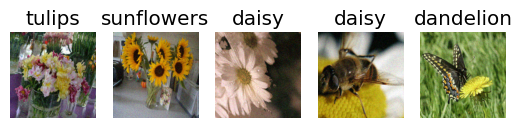

In [ ]:
images, values = next(iter(augmented_train_data))
display_images_with_labels(images[:5], values[:5], labels)

In [ ]:
# Build a model
mobilenet_v2_model_2 = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),  # it computes the average of all the elements in each feature map, resulting in a single value for each feature map

    tf.keras.layers.Dense(num_classes, activation="softmax")
])

In [ ]:
# Compile the model
mobilenet_v2_model_2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=3e-3, momentum=0.9, nesterov=True),
                           loss=tf.keras.losses.SparseCategoricalCrossentropy,
                           metrics=['accuracy'])

In [ ]:
# Train/Fit the model
EPOCHS = 15

mobilenet_v2_history_2 = mobilenet_v2_model_2.fit(augmented_train_data,
                                                  epochs=EPOCHS,
                                                  validation_data=test_data)

Epoch 1/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 46s 312ms/step - accuracy: 0.5950 - loss: 1.0502 - val_accuracy: 0.8203 - val_loss: 0.4895
Epoch 2/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 66s 226ms/step - accuracy: 0.8500 - loss: 0.4376 - val_accuracy: 0.8333 - val_loss: 0.4408
Epoch 3/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 24s 201ms/step - accuracy: 0.8606 - loss: 0.3727 - val_accuracy: 0.8519 - val_loss: 0.4165
Epoch 4/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 42s 203ms/step - accuracy: 0.8853 - loss: 0.3597 - val_accuracy: 0.8660 - val_loss: 0.3798
Epoch 5/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 197ms/step - accuracy: 0.8914 - loss: 0.2956 - val_accuracy: 0.8649 - val_loss: 0.3747
Epoch 6/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 200ms/step - accuracy: 0.9001 - loss: 0.2829 - val_accuracy: 0.8649 - val_loss: 0.3672
Epoch 7/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 204ms/step - accuracy: 0.9031 - loss: 0.2702 - val_accuracy: 0.8736 - val_loss: 0.3639
Epoch 8/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 25s 195ms/step - accuracy: 0.9172 - loss: 0.2435 - val_accu

<Figure size 1000x1000 with 0 Axes>

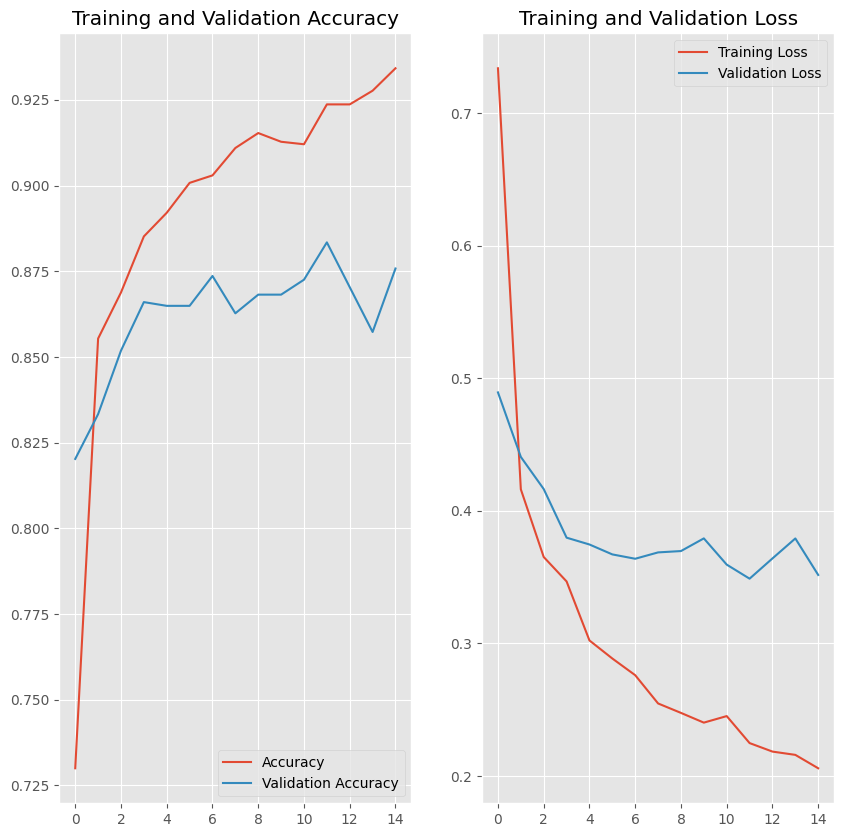

In [ ]:
plot_accuracy_and_loss_comparison(mobilenet_v2_history_2, EPOCHS)

### I see that I didn't manage to improve the performance of my model, even after adding data augmentation layers, which is a bit disappointing. However, for a memory-efficient model like MobileNet, achieving **90% accuracy** (model trained on non-augmented data) is still quite good. I'm curious how other more advanced models would perform on this dataset, but I guess we'll never know unless we try them ourselves. But I am not going to do that, maybe later😄.

## `MobileNetV2` **Model(trained on non-augmented data) Evaluation** (Confusion Matrix)

In [26]:
test_data_no_batch = test_data.unbatch()
test_data_no_batch = test_data_no_batch.batch(num_testing_examples)

In [ ]:
# evaluation = mobilenet_v2_model.evaluate(test_data_no_batch)
# print(f"Accuracy: {evaluation[1] * 100:.2f}%")  # this gonna output the same val_accuracy as in the last epoch of model trianing

In [27]:
true_labels = []
pred_labels = []

for images, labels in test_data_no_batch.take(1):
  predictions = mobilenet_v2_model.predict(images)
  pred_labels.extend(np.argmax(predictions, axis=1))
  true_labels.extend(labels.numpy())

len(true_labels), len(pred_labels)

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step


(918, 918)

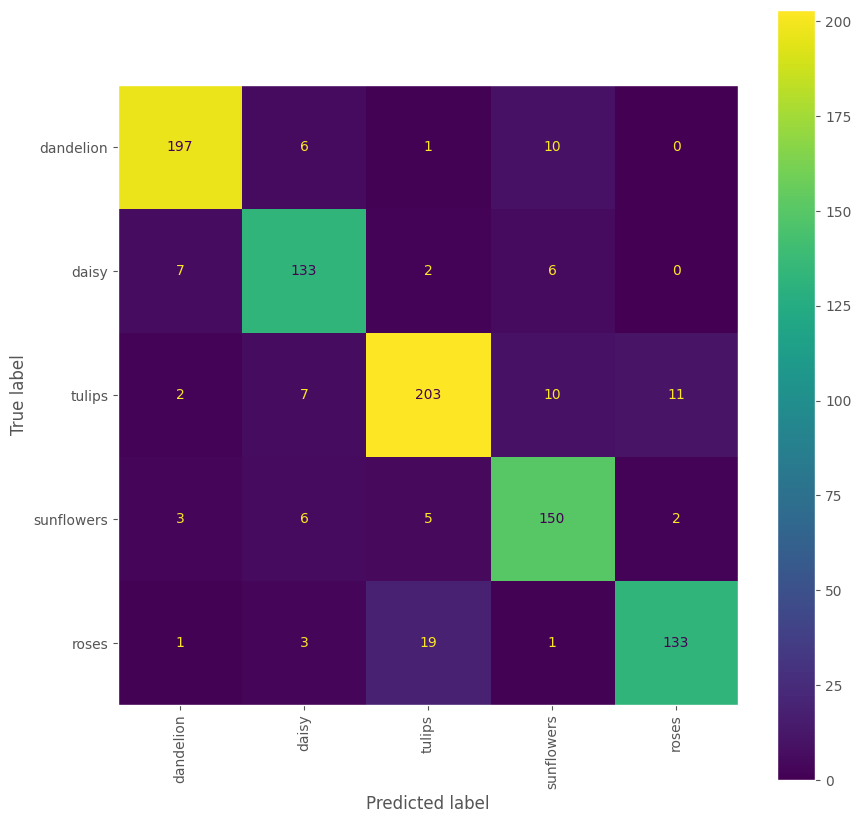

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(true_labels, pred_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)

fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax, cmap='viridis')
plt.grid(False)

plt.show()

## `MobileNetV2` **Model Saving** in `.keras` and `.h5` formats

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [42]:
import os

model_dir = '/content/drive/MyDrive/Colab Notebooks/cv-learning-2-month-plan/models'

if not os.path.exists(model_dir):
    os.makedirs(model_dir)

In [ ]:
mobilenet_v2_model.save(os.path.join(model_dir, 'MobileNetV2-flowers-classification-model.keras'))

In [1]:
# loaded_model = tf.keras.models.load_model(os.path.join(model_dir, 'MobileNetV2-flowers-classification-model.keras'))

### Well, I'm not sure about the exact cause of the error after implementing the previous cell, but due to some limitations of Colab notebooks, I can't spend much time retraining this model repeatedly to resolve all errors. However, at least now you know how to save models using two formats: `.keras` and `.h5`. Hopefully, there won’t be any more such errors moving forward.

